# **Library Imports**

In [ ]:
# 1. Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import shap  # Import SHAP for Explainable AI


# **Data Importing**

In [ ]:
# 2. Data Importing
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the dataset
print("Train Data Sample:")
print(train_df.head())


Train Data Sample:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0 

# **Exploratory Data Analysis (EDA)**


Missing Values in Train Data:
Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64


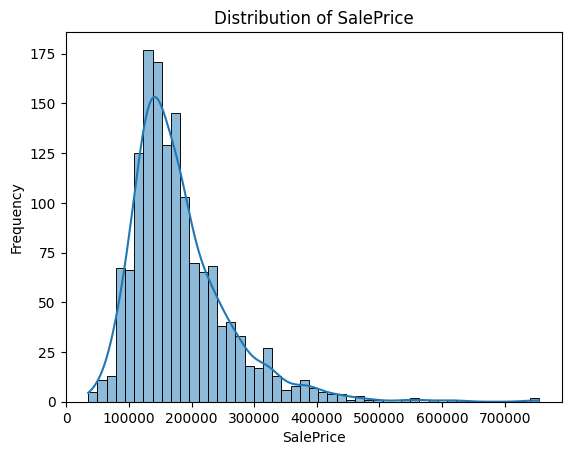

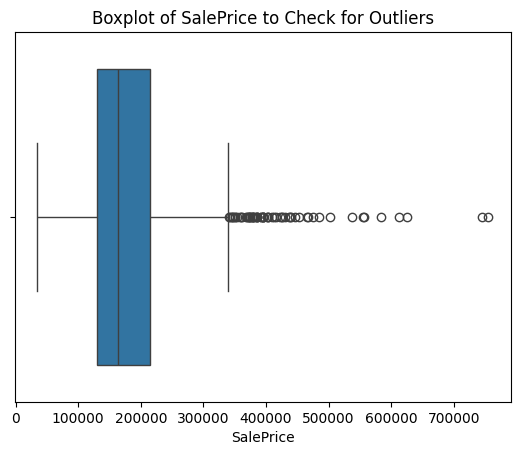

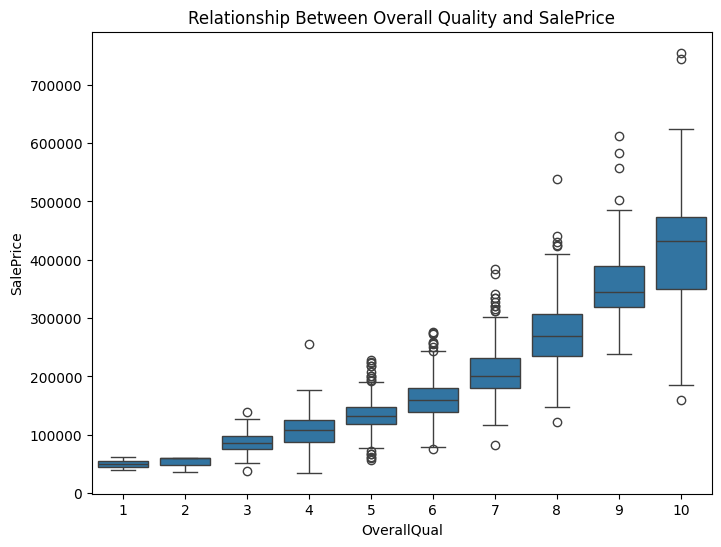

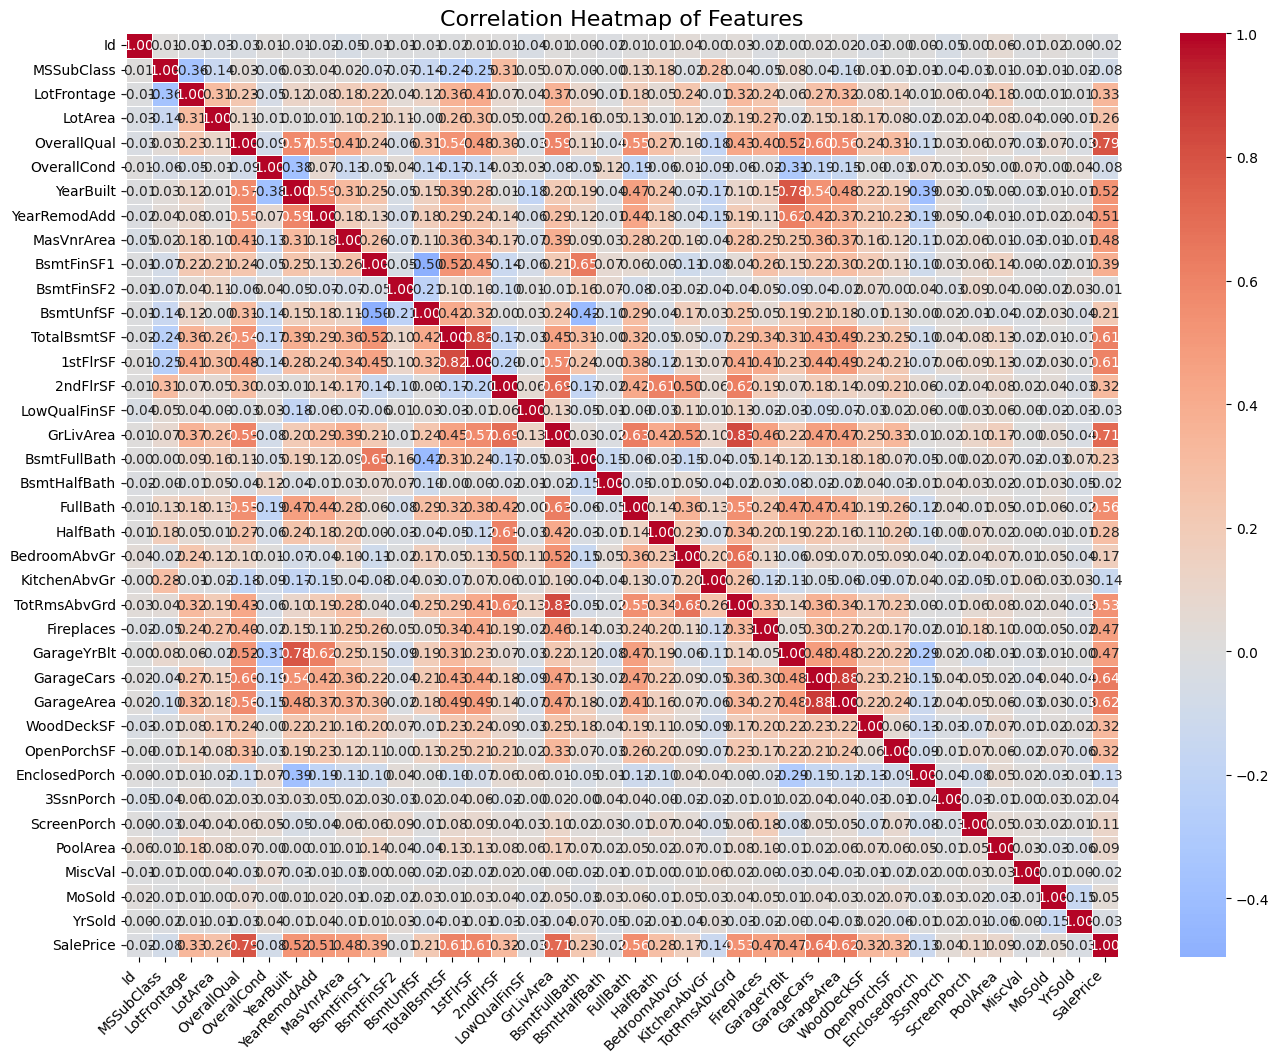

In [ ]:
# 3. Exploratory Data Analysis (EDA)

# Check for missing values in the dataset
print("\nMissing Values in Train Data:")
missing_values = train_df.isnull().sum()
print(missing_values)

# Visualizing the distribution of the target variable 'SalePrice'
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Check for outliers in the 'SalePrice' variable using a boxplot
sns.boxplot(x=train_df['SalePrice'])
plt.title("Boxplot of SalePrice to Check for Outliers")
plt.show()

# Visualizing the relationship between 'OverallQual' and 'SalePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title("Relationship Between Overall Quality and SalePrice")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = train_df[numeric_cols].corr()

# Create a larger figure for better readability
plt.figure(figsize=(16, 12))

# Use a distinct color palette
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, annot_kws={"size": 10}, linewidths=0.5)

# Rotate x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()




# **Data Cleaning**

In [ ]:
# 4. Data Cleaning

# Fill missing values in numeric columns with the mean
numeric_cols = train_df.select_dtypes(include=['number']).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())

# Checking the number of missing values again after filling numeric columns
print("\nMissing Values in Numeric Columns After Filling:")
print(train_df[numeric_cols].isnull().sum())

# Fill missing values in categorical columns with the mode (most frequent value)
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Checking missing values in categorical columns
print("\nMissing Values in Categorical Columns After Filling:")
print(train_df[categorical_cols].isnull().sum())

# Handling categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Make sure both train and test data have the same columns (alignment)
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Verify final shape of train and test data
print(f"\nTrain Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")



Missing Values in Numeric Columns After Filling:
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Missing Values in Categorical Columns After Filling:
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborh

/tmp/ipython-input-4044183106.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)


# **Feature Selection and Data Splitting**

In [ ]:
# 5. Feature Selection (Selecting features for the model)
# Selecting features based on correlation and domain knowledge
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath']
X = train_df[features]
y = train_df['SalePrice']

# 6. Data Splitting (Train-Test Split)
# Splitting data into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (important for models like SVM and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Verify scaling by checking the mean and variance of scaled features
print("\nMean and Variance of Scaled Features for Training Set:")
print("Mean:", X_train_scaled.mean(axis=0))
print("Variance:", X_train_scaled.var(axis=0))



Mean and Variance of Scaled Features for Training Set:
Mean: [-5.17090176e-17 -1.30793397e-16  2.58545088e-17  1.96190096e-16
 -1.85544122e-16 -5.47507245e-17]
Variance: [1. 1. 1. 1. 1. 1.]


# **Model Training and Evaluation**

Linear Regression:
  Mean Squared Error (MSE): 1596922155.9824
  Mean Absolute Error (MAE): 25410.2298
  R² Score: 0.7918
  Root Mean Squared Error (RMSE): 39961.5084


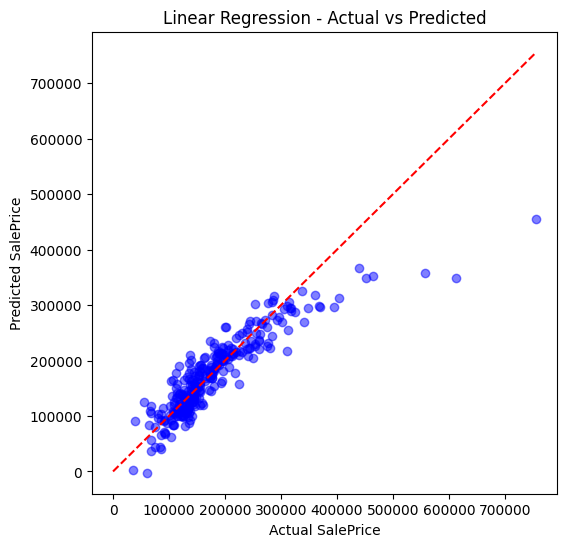

Ridge Regression:
  Mean Squared Error (MSE): 1597215622.0032
  Mean Absolute Error (MAE): 25406.8430
  R² Score: 0.7918
  Root Mean Squared Error (RMSE): 39965.1801


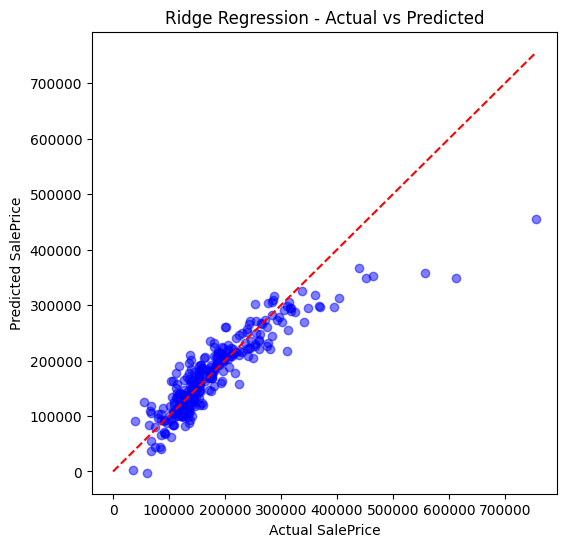

SVM:
  Mean Squared Error (MSE): 7846451393.3066
  Mean Absolute Error (MAE): 59443.6404
  R² Score: -0.0230
  Root Mean Squared Error (RMSE): 88580.1975


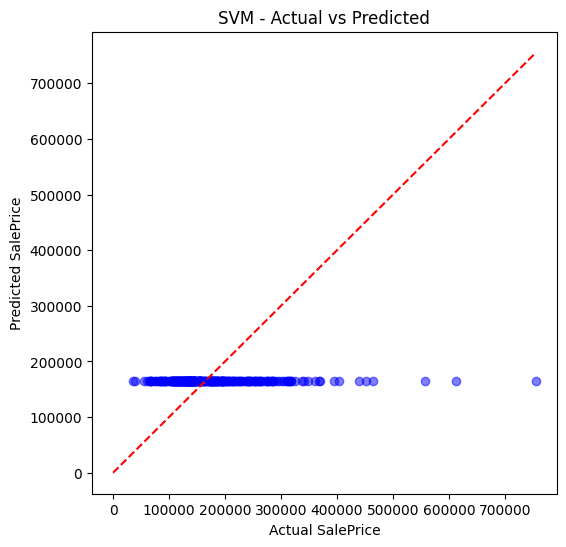

XGBoost:
  Mean Squared Error (MSE): 891388608.0000
  Mean Absolute Error (MAE): 20006.0312
  R² Score: 0.8838
  Root Mean Squared Error (RMSE): 29856.1318


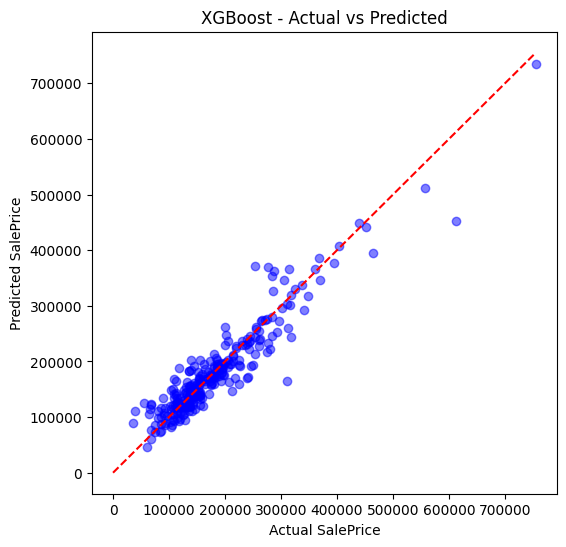

In [ ]:
# 7. Model Training and Evaluation

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "SVM": SVR(),
    "XGBoost": xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Fit the model on training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on validation data
    y_pred = model.predict(X_valid_scaled)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Plotting Actual vs Predicted for each model
    plt.figure(figsize=(6, 6))
    plt.scatter(y_valid, y_pred, alpha=0.5, color='blue')
    plt.plot([0, max(y_valid)], [0, max(y_valid)], color='red', linestyle='--')
    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()


# **Hyperparameter Tuning with GridSearchCV for XGBoost**

In [ ]:
# 8. Hyperparameter Tuning (Example with XGBoost using GridSearchCV)
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
print("\nBest Hyperparameters for XGBoost:")
print(grid_search.best_params_)

# Final Model Training (XGBoost) for Kaggle Submission
final_model = grid_search.best_estimator_
final_model.fit(scaler.fit_transform(X), y)

# Prepare the test data for prediction
test_data = test_df[features]
test_data_scaled = scaler.transform(test_data)

# Make predictions on the test dataset
test_predictions = final_model.predict(test_data_scaled)

# Prepare the Kaggle submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

print("\nModel training complete. Kaggle submission file ('submission.csv') is ready.")



Best Hyperparameters for XGBoost:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Model training complete. Kaggle submission file ('submission.csv') is ready.


# **SHAP Analysis for Explainable AI**

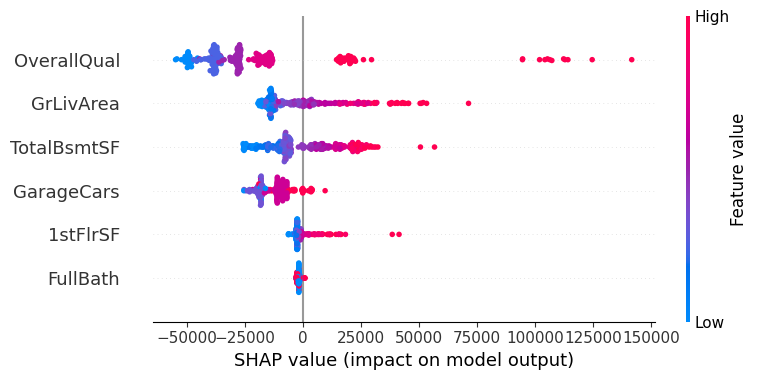

In [ ]:
# 9. Explainable AI (XAI) - SHAP Analysis
# Initialize the SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(final_model)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(X_valid_scaled)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_valid)

# Visualize the SHAP values for a specific prediction (first instance in validation set)
shap.initjs()  # for visualizing in Jupyter notebooks

# The correct way to plot the force plot:
shap.force_plot(explainer.expected_value, shap_values[0], X_valid.iloc[0])
